In [130]:
import requests
import json
import pandas as pd
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36','Host': 'datacenter-web.eastmoney.com',
'Referer': 'https://data.eastmoney.com/'}
params={
    'callback': 'datatable5712053',
    'columns': 'REPORT_DATE,TIME,DOMESTICL_PRODUCT_BASE,FIRST_PRODUCT_BASE,SECOND_PRODUCT_BASE,THIRD_PRODUCT_BASE,SUM_SAME,FIRST_SAME,SECOND_SAME,THIRD_SAME',
    'pageNumber': 2,
    'pageSize': 20,
    'sortColumns': 'REPORT_DATE',
    'sortTypes': -1,
    'source': 'WEB',
    'client': 'WEB',
    'reportName': 'RPT_ECONOMY_GDP',
    '_': 1656339411680
}
url ='https://datacenter-web.eastmoney.com/api/data/v1/get'
value_list=[]
for j in [1,2,3,4]:
    params['pageNumber']=j
    resp = requests.get(url=url, headers=headers,params=params)
    data=json.loads(resp.text[17:-2])
    for i in data['result']['data']:        
        TIME=i['TIME']
        DOMESTICL_PRODUCT_BASE=i['DOMESTICL_PRODUCT_BASE']
        FIRST_PRODUCT_BASE=i['FIRST_PRODUCT_BASE']
        SECOND_PRODUCT_BASE=i['SECOND_PRODUCT_BASE']
        THIRD_PRODUCT_BASE=i['THIRD_PRODUCT_BASE']
        SUM_SAME=i['SUM_SAME']
        FIRST_SAME=i['FIRST_SAME']
        SECOND_SAME=i['SECOND_SAME']
        THIRD_SAME=i['THIRD_SAME']
        values=[TIME,DOMESTICL_PRODUCT_BASE,SUM_SAME,FIRST_PRODUCT_BASE,FIRST_SAME,SECOND_PRODUCT_BASE,SECOND_SAME,THIRD_PRODUCT_BASE,THIRD_SAME]
        value_list.append(values)
        resp.close() 
column=['统计时间','国内生产总值（亿元）','国内生产总值季度累计同比增长（%）','第一产业增加值（亿元）','第一产业增加值季度累计同比增长（%）','第二产业增加值（亿元）','第二产业增加值季度累计同比增长（%）','第三产业增加值（亿元）','第三产业增加值季度累计同比增长（%）']
pd.DataFrame(value_list,columns=column).to_csv("GDP.csv",mode='w',encoding='gbk',index=False)
print("写入完毕")
resp.close() 

写入完毕


In [131]:
df=pd.read_csv("GDP.csv",encoding='gbk')
df.head() 

,统计时间,国内生产总值（亿元）,国内生产总值季度累计同比增长（%）,第一产业增加值（亿元）,第一产业增加值季度累计同比增长（%）,第二产业增加值（亿元）,第二产业增加值季度累计同比增长（%）,第三产业增加值（亿元）,第三产业增加值季度累计同比增长（%）
0,2022年第1季度,270177.8,4.8,10953.8,6.0,106186.6,5.8,153037.4,4.0
1,2021年第1-4季度,1143669.7,8.1,83085.5,7.1,450904.5,8.2,609679.7,8.2
2,2021年第1-3季度,819432.3,9.8,51613.3,7.4,320254.7,10.6,447564.3,9.5
3,2021年第1-2季度,529513.0,12.7,28512.8,7.8,206732.7,14.8,294267.4,11.8
4,2021年第1季度,247985.0,18.3,11373.8,8.1,92432.2,24.4,144179.0,15.6


In [132]:
df = df.drop_duplicates()

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 64
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   统计时间                65 non-null     object 
 1   国内生产总值（亿元）          65 non-null     float64
 2   国内生产总值季度累计同比增长（%）   65 non-null     float64
 3   第一产业增加值（亿元）         65 non-null     float64
 4   第一产业增加值季度累计同比增长（%）  65 non-null     float64
 5   第二产业增加值（亿元）         65 non-null     float64
 6   第二产业增加值季度累计同比增长（%）  65 non-null     float64
 7   第三产业增加值（亿元）         65 non-null     float64
 8   第三产业增加值季度累计同比增长（%）  65 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.1+ KB


In [137]:
df1=df[:][1:66:4] #拿到各年的1-4季度值
df1.head()

,统计时间,国内生产总值（亿元）,国内生产总值季度累计同比增长（%）,第一产业增加值（亿元）,第一产业增加值季度累计同比增长（%）,第二产业增加值（亿元）,第二产业增加值季度累计同比增长（%）,第三产业增加值（亿元）,第三产业增加值季度累计同比增长（%）
1,2021年第1-4季度,1143669.7,8.1,83085.5,7.1,450904.5,8.2,609679.7,8.2
5,2020年第1-4季度,1013567.0,2.3,78030.9,3.0,383562.4,2.6,551973.7,2.1
9,2019年第1-4季度,986515.2,6.1,70473.6,3.1,380670.6,5.7,535371.0,6.9
13,2018年第1-4季度,919281.1,6.6,64745.2,3.5,364835.2,5.8,489700.8,7.6
17,2017年第1-4季度,832035.9,6.9,62099.5,3.9,331580.5,6.1,438355.9,8.0


In [138]:
import seaborn as sns
color_map = sns.light_palette('orange', as_cmap=True)
df1.describe().style.background_gradient(color_map) #2012-2021年的信息

,国内生产总值（亿元）,国内生产总值季度累计同比增长（%）,第一产业增加值（亿元）,第一产业增加值季度累计同比增长（%）,第二产业增加值（亿元）,第二产业增加值季度累计同比增长（%）,第三产业增加值（亿元）,第三产业增加值季度累计同比增长（%）
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,635173.818750,8.293750,52146.175000,4.137500,264497.900000,8.550000,318529.725000,8.893750
std,286429.857710,2.777641,17782.180094,0.987843,101378.088304,3.299697,168275.666340,3.060167
min,219438.500000,2.300000,23317.000000,3.000000,104359.200000,2.600000,91762.200000,2.100000
25%,396218.900000,6.850000,37219.050000,3.500000,183762.075000,6.175000,175237.700000,7.775000
50%,618263.150000,7.850000,54327.200000,3.950000,269617.200000,8.100000,294318.750000,8.200000
75%,853847.200000,9.550000,62760.925000,4.350000,339894.175000,10.400000,451192.125000,9.625000
max,1143669.700000,14.200000,83085.500000,7.100000,450904.500000,15.100000,609679.700000,16.100000


In [139]:
#制作各年份的透视表并拿到国内生产总值季度累计同比增长（%）降序排列
df2= pd.pivot_table(df1[['国内生产总值季度累计同比增长（%）','统计时间']],index='统计时间')
df2.sort_values('国内生产总值季度累计同比增长（%）',inplace=True,ascending=False)
df2.head(len(df2.index))

,国内生产总值季度累计同比增长（%）
统计时间,
2007年第1-4季度,14.2
2006年第1-4季度,12.7
2010年第1-4季度,10.6
2008年第1-4季度,9.7
2011年第1-4季度,9.5
2009年第1-4季度,9.4
2021年第1-4季度,8.1
2012年第1-4季度,7.9
2013年第1-4季度,7.8


In [140]:
#制作各年份的透视表并拿到第一产业增加值季度累计同比增长（%）降序排列
df3= pd.pivot_table(df1[['第一产业增加值季度累计同比增长（%）','统计时间']],index='统计时间')
df3.sort_values('第一产业增加值季度累计同比增长（%）',inplace=True,ascending=False)
df3.head(len(df3.index))

,第一产业增加值季度累计同比增长（%）
统计时间,
2021年第1-4季度,7.1
2008年第1-4季度,5.2
2006年第1-4季度,4.8
2012年第1-4季度,4.5
2010年第1-4季度,4.3
2011年第1-4季度,4.2
2014年第1-4季度,4.1
2009年第1-4季度,4.0
2015年第1-4季度,3.9


In [141]:
#制作各年份的透视表并拿到第二产业增加值季度累计同比增长（%）降序排列
df4= pd.pivot_table(df1[['第二产业增加值季度累计同比增长（%）','统计时间']],index='统计时间')
df4.sort_values('第二产业增加值季度累计同比增长（%）',inplace=True,ascending=False)
df4.head(len(df4.index))

,第二产业增加值季度累计同比增长（%）
统计时间,
2007年第1-4季度,15.1
2006年第1-4季度,13.5
2010年第1-4季度,12.7
2011年第1-4季度,10.7
2009年第1-4季度,10.3
2008年第1-4季度,9.8
2012年第1-4季度,8.4
2021年第1-4季度,8.2
2013年第1-4季度,8.0


In [142]:
#制作各年份的透视表并拿到第三产业增加值季度累计同比增长（%）降序排列
df5= pd.pivot_table(df1[['第三产业增加值季度累计同比增长（%）','统计时间']],index='统计时间')
df5.sort_values('第三产业增加值季度累计同比增长（%）',inplace=True,ascending=False)
df5.head(len(df5.index))

,第三产业增加值季度累计同比增长（%）
统计时间,
2007年第1-4季度,16.1
2006年第1-4季度,14.1
2008年第1-4季度,10.5
2010年第1-4季度,9.7
2009年第1-4季度,9.6
2011年第1-4季度,9.5
2013年第1-4季度,8.3
2015年第1-4季度,8.2
2021年第1-4季度,8.2


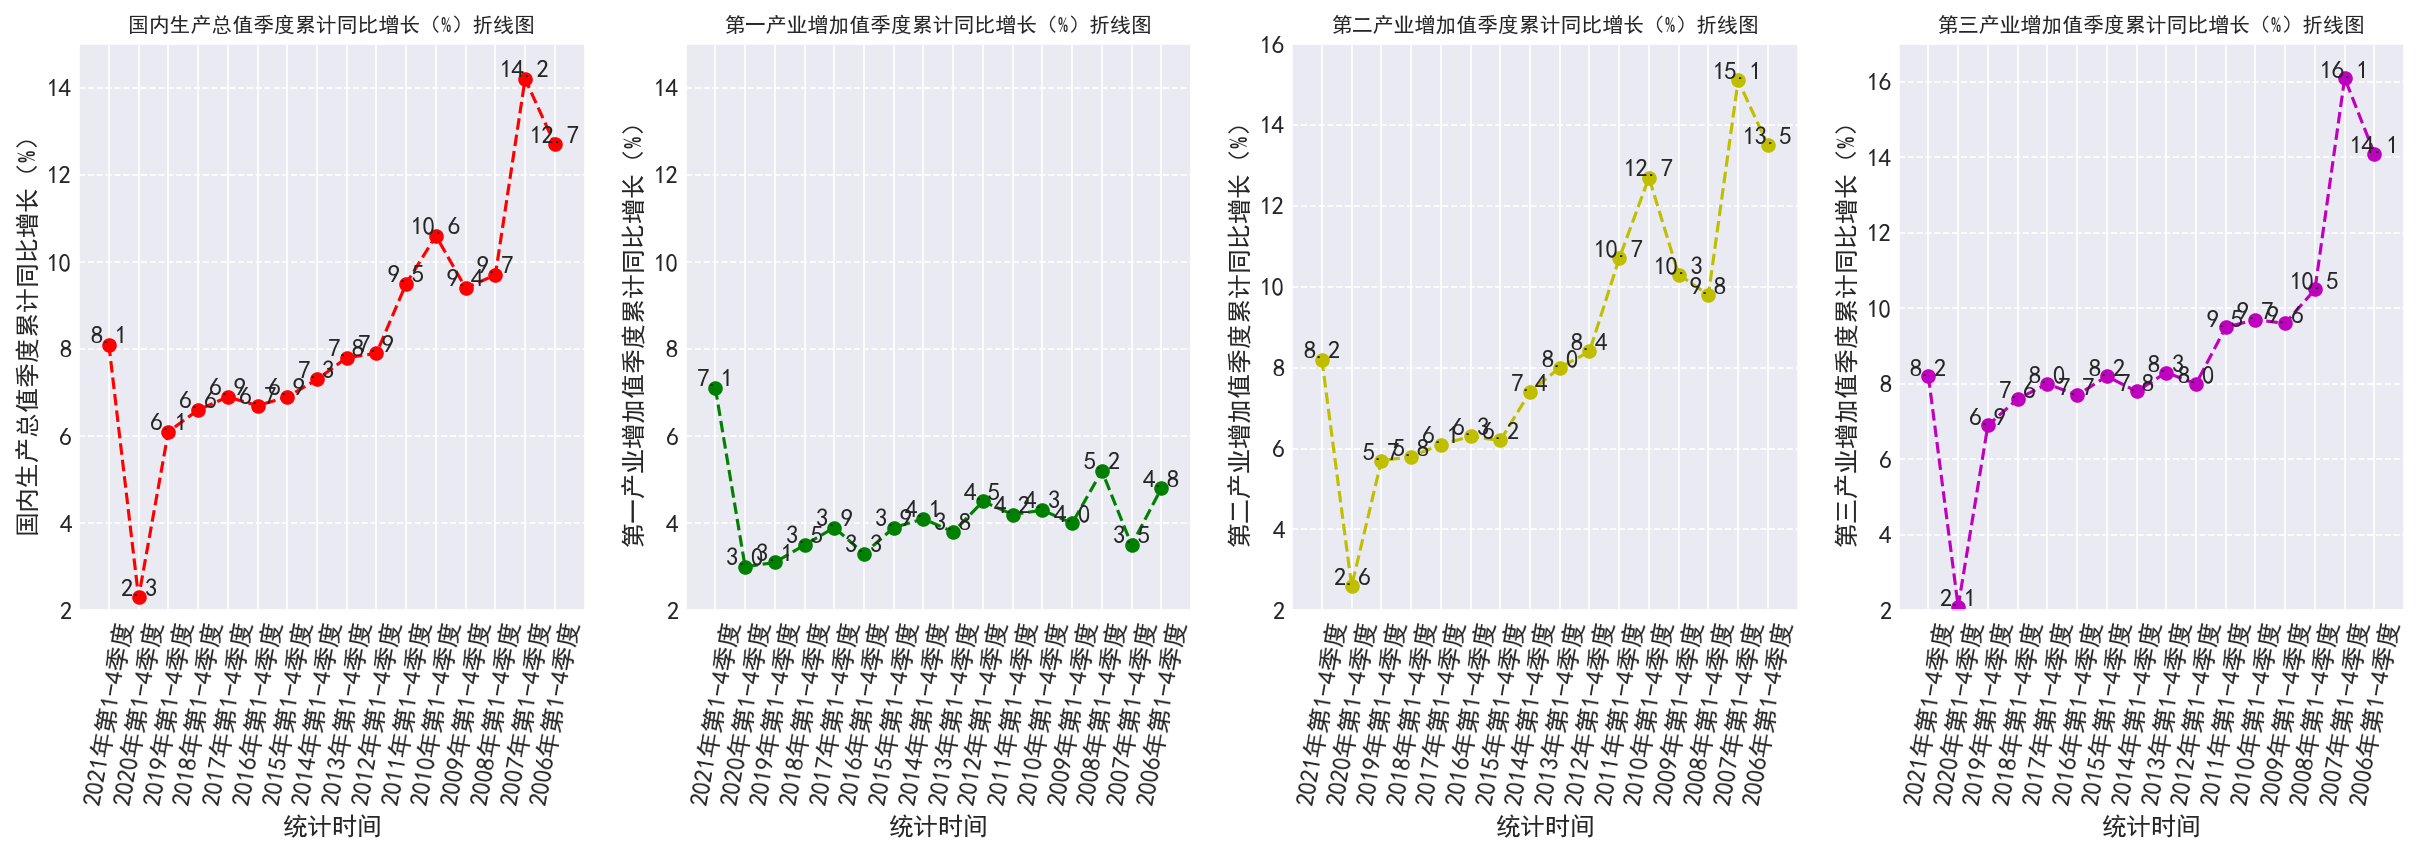

In [154]:
# 各年份国内生产总值季度累计同比增长（%），第一产业，第二产业，第三产业的增加值季度累计同比增长（%）曲线图
import matplotlib.pyplot as plt
import numpy as np
pl=plt.figure(figsize=(20,5),dpi=150) #创建一块画布
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['xtick.direction']='in' 
plt.rcParams['ytick.direction']='in'

ax1=pl.add_subplot(1,4,1) 
data=np.arange(1,17)
x=df1['统计时间']
y=df1['国内生产总值季度累计同比增长（%）']
plt.xlabel('统计时间')
plt.ylabel('国内生产总值季度累计同比增长（%）')
plt.xlim((0,17))
plt.ylim((2,15))
plt.xticks(range(1,17,1),x,rotation=80)
plt.grid(linestyle='--',axis='y')
plt.title("国内生产总值季度累计同比增长（%）折线图",fontsize=10)
plt.plot(data,y,'ro--')
for a,b in zip(data,y):
    plt.text(a,b+0.2,b,ha='center',va='center')

ax2=pl.add_subplot(1,4,2) 
data1=np.arange(1,17)
x1=df1['统计时间']
y1=df1['第一产业增加值季度累计同比增长（%）']
plt.xlabel('统计时间')
plt.ylabel('第一产业增加值季度累计同比增长（%）')
plt.xlim((0,17))
plt.ylim((2,15))
plt.xticks(range(1,17,1),x1,rotation=80)
plt.grid(linestyle='--',axis='y')
plt.title("第一产业增加值季度累计同比增长（%）折线图",fontsize=10)
plt.plot(data1,y1,'go--')
for a,b in zip(data1,y1):
    plt.text(a,b+0.2,b,ha='center',va='center')
    
ax3=pl.add_subplot(1,4,3) 
data2=np.arange(1,17)
x2=df1['统计时间']
y2=df1['第二产业增加值季度累计同比增长（%）']
plt.xlabel('统计时间')
plt.ylabel('第二产业增加值季度累计同比增长（%）')
plt.xlim((0,17))
plt.ylim((2,16))
plt.xticks(range(1,17,1),x2,rotation=80)
plt.grid(linestyle='--',axis='y')
plt.title("第二产业增加值季度累计同比增长（%）折线图",fontsize=10)
plt.plot(data1,y2,'yo--')
for a,b in zip(data2,y2):
    plt.text(a,b+0.2,b,ha='center',va='center')
    
ax4=pl.add_subplot(1,4,4) 
data3=np.arange(1,17)
x3=df1['统计时间']
y3=df1['第三产业增加值季度累计同比增长（%）']
plt.xlabel('统计时间')
plt.ylabel('第三产业增加值季度累计同比增长（%）')
plt.xlim((0,17))
plt.ylim((2,17))
plt.xticks(range(1,17,1),x3,rotation=80)
plt.grid(linestyle='--',axis='y')
plt.title("第三产业增加值季度累计同比增长（%）折线图",fontsize=10)
plt.plot(data1,y3,'mo--')
for a,b in zip(data3,y3):
    plt.text(a,b+0.2,b,ha='center',va='center')

plt.show()


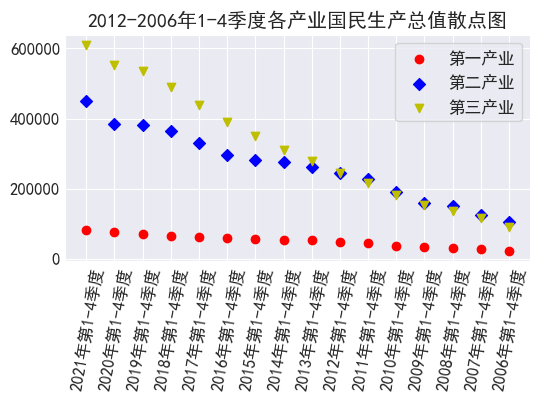

In [161]:
# 2006-2021年1-4季度各产业国民生产总值散点图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
pl=plt.figure(figsize=(6,3),dpi=100)
plt.title("2012-2006年1-4季度各产业国民生产总值散点图")
plt.scatter(range(1,17,1),df1.loc[range(1,62,4),'第一产业增加值（亿元）'],marker='o',c='r')
plt.scatter(range(1,17,1),df1.loc[range(1,62,4),'第二产业增加值（亿元）'],marker='D',c='b')
plt.scatter(range(1,17,1),df1.loc[range(1,62,4),'第三产业增加值（亿元）'],marker='v',c='y')
plt.legend(['第一产业','第二产业','第三产业'])
plt.xticks(range(1,17,1),df1['统计时间'],rotation=80)
plt.show()

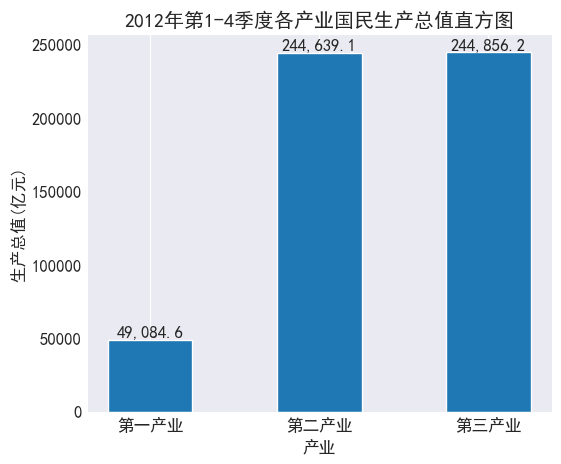

In [164]:
# 2012年1-4季度国内生产总值各产业国民生产总值直方图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(6,5),dpi=100)
data=[df1.loc[37,'第一产业增加值（亿元）'],df1.loc[37,'第二产业增加值（亿元）'],df1.loc[37,'第三产业增加值（亿元）']]
x=range(1,4)
plt.bar(x,data,width=0.5)
plt.title("2012年第1-4季度各产业国民生产总值直方图")
plt.xlabel("产业")
plt.ylabel("生产总值(亿元)")
plt.grid(axis='y')
for a,b in zip(x,data):
    plt.text(a,b,format(b,','),ha='center',va='bottom')
plt.xticks(x,['第一产业','第二产业','第三产业'])
plt.show()

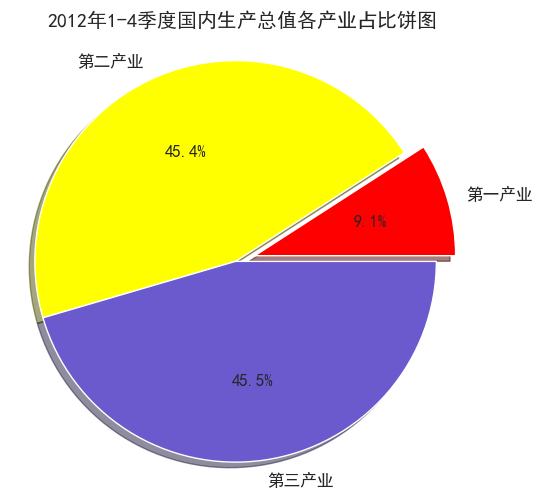

In [165]:
# 2012年1-4季度国内生产总值各产业占比饼图
import matplotlib.pyplot as plot
plt.figure(figsize=(6,6),dpi=100)
plt.rcParams['font.sans-serif']=['SimHei']
colors=['red','yellow','slateblue']
data=[df1.loc[37,'第一产业增加值（亿元）'],df1.loc[37,'第二产业增加值（亿元）'],df1.loc[37,'第三产业增加值（亿元）']]
plt.pie(data,labels=['第一产业','第二产业','第三产业'],explode=[0.1,0,0],shadow=True,colors=colors,autopct='%.1f%%',startangle=0)
plt.axis('equal')
plt.title("2012年1-4季度国内生产总值各产业占比饼图")
plt.show()

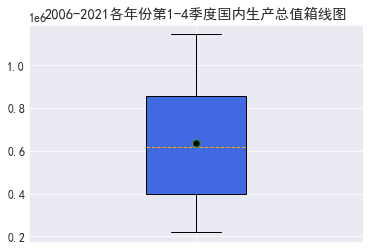

In [166]:
#2006-2021各年份第1-4季度国内生产总值箱线图
import matplotlib.pyplot as plt
plt.boxplot(x=df.loc[range(1,62,4),'国内生产总值（亿元）'],
            whis=1.5,  
            widths=0.3,
            patch_artist=True, 
            showmeans=True, 
            boxprops={'facecolor':'RoyalBlue'}, 
            flierprops={'markerfacecolor':'red','markeredgecolor':'red','markersize':3},
            meanprops={'marker':'h','markerfacecolor':'black','markersize':8},
            medianprops={'linestyle':'--','color':'orange'},
            labels=[''])
plt.title("2006-2021各年份第1-4季度国内生产总值箱线图")
plt.show()

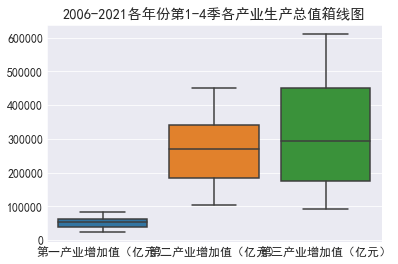

In [167]:
#2006-2021各年份第1-4季各产业生产总值箱线图
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False
data=pd.DataFrame([df1.loc[range(1,62,4),'第一产业增加值（亿元）'],df1.loc[range(1,62,4),'第二产业增加值（亿元）'],df1.loc[range(1,62,4),'第三产业增加值（亿元）']])
sns.boxplot(data=data.T)
plt.title("2006-2021各年份第1-4季各产业生产总值箱线图")
plt.show()

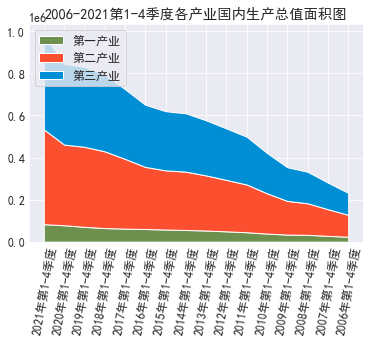

In [169]:
#2006-2021第1-4季度各产业国内生产总值面积图
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif']='SimHei'
x=range(1,17)
y1=df1.loc[range(1,62,4),'第一产业增加值（亿元）']
y2=df1.loc[range(1,62,4),'第二产业增加值（亿元）']
y3=df1.loc[range(1,62,4),'第二产业增加值（亿元）']
plt.stackplot(x,y1,y2,y3,colors=['#6d904f','#fc4f30','#008fd5'])
plt.legend(['第一产业','第二产业','第三产业'],loc='upper left')
plt.xticks(x,df1['统计时间'],rotation=80)
plt.title("2006-2021第1-4季度各产业国内生产总值面积图")
plt.show()

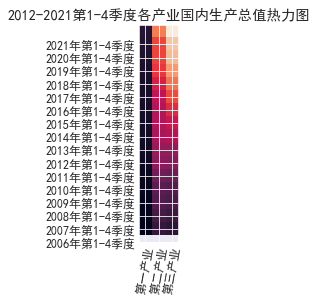

In [171]:
#2006-2021第1-4季度各产业国内生产总值热力图
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif']='SimHei'
data=pd.DataFrame([df1.loc[range(1,62,4),'第一产业增加值（亿元）'],df1.loc[range(1,62,4),'第二产业增加值（亿元）'],df1.loc[range(1,62,4),'第三产业增加值（亿元）']])
plt.imshow(data.T)
plt.xticks(range(0,3,1),['第一产业','第二产业','第三产业'],rotation=80)
plt.yticks(range(1,17),df1['统计时间'])
plt.title("2006-2021第1-4季度各产业国内生产总值热力图")
plt.show()

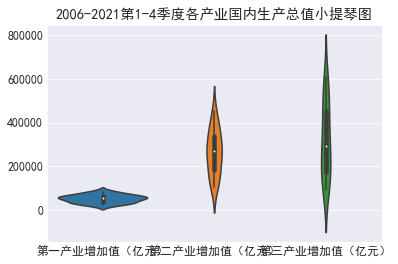

In [172]:
#2006-2021第1-4季度各产业国内生产总值小提琴图
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.DataFrame([df1.loc[range(1,62,4),'第一产业增加值（亿元）'],df1.loc[range(1,62,4),'第二产业增加值（亿元）'],df1.loc[range(1,62,4),'第三产业增加值（亿元）']])
sns.violinplot(data=data.T) #使用sns.volinplot绘制小提琴图，粗黑线表示四分位数范围，延伸细线表示95%置信区间，白点位中位数
plt.title("2006-2021第1-4季度各产业国内生产总值小提琴图")
plt.show()

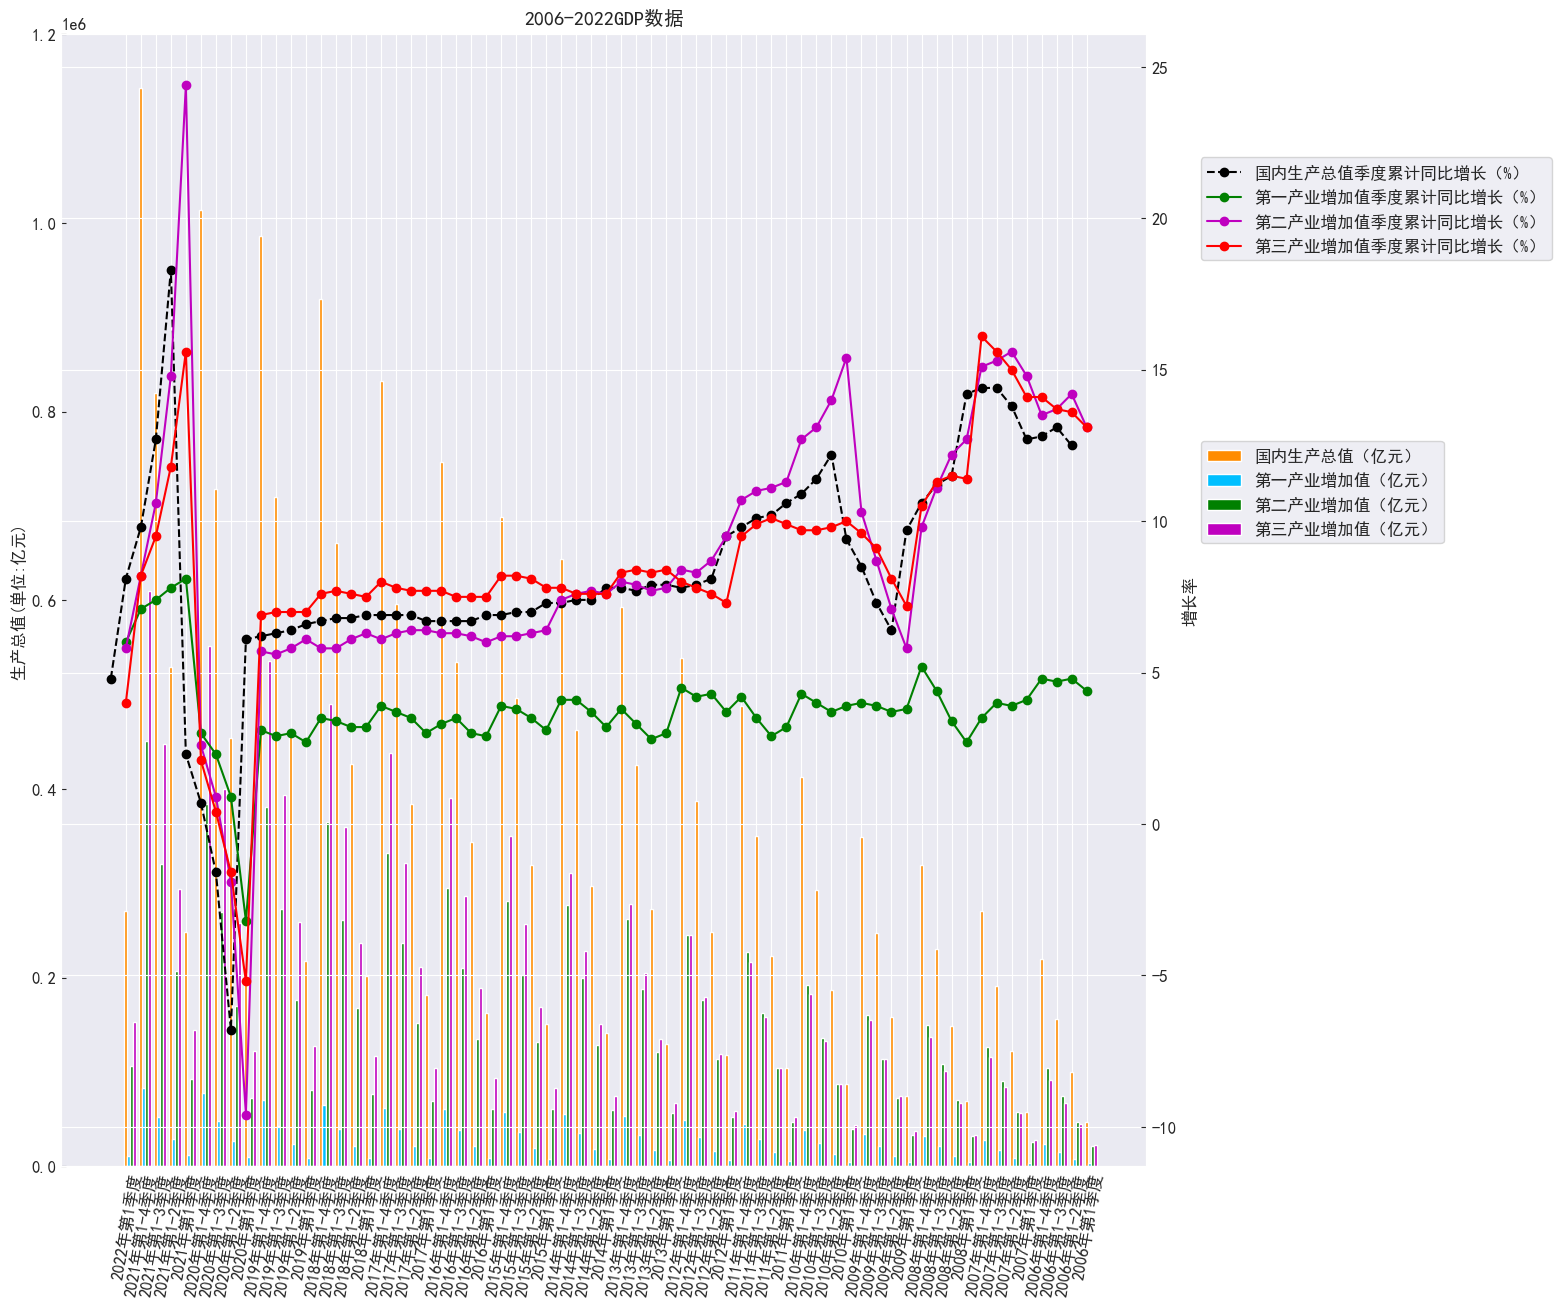

In [180]:
#总的数据GDP视图分析
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
pl=plt.figure(figsize=(14,15),dpi=100)
ax1=pl.add_subplot(111)
width=0.2
plt.grid(axis='y')
x=np.arange(1,66)
plt.title("2006-2022GDP数据")
plt.bar(x,df['国内生产总值（亿元）'],width=width,color='darkorange')
plt.bar(x+width,df['第一产业增加值（亿元）'],width=width,color='deepskyblue') 
plt.bar(x+2*width,df['第二产业增加值（亿元）'],width=width,color='g') 
plt.bar(x+3*width,df['第三产业增加值（亿元）'],width=width,color='m') 
plt.xticks(x,df['统计时间'],rotation=80)
ax1.set_ylabel('生产总值(单位:亿元)')
plt.legend(['国内生产总值（亿元）','第一产业增加值（亿元）','第二产业增加值（亿元）','第三产业增加值（亿元）'],loc=(1.05,0.55))
ax2=ax1.twinx()  #ax1和ax2共享x轴
ax2.plot(df['统计时间'],df['国内生产总值季度累计同比增长（%）'],'ko--',x,df['第一产业增加值季度累计同比增长（%）'],'go-',x,df['第二产业增加值季度累计同比增长（%）'],'mo-',x,df['第三产业增加值季度累计同比增长（%）'],'ro-')
ax2.set_ylabel('增长率')
plt.legend(['国内生产总值季度累计同比增长（%）','第一产业增加值季度累计同比增长（%）','第二产业增加值季度累计同比增长（%）','第三产业增加值季度累计同比增长（%）'],loc=(1.05,0.8))
plt.show()